2000预测279.16,2010预测:308.53,2020预测:339.68


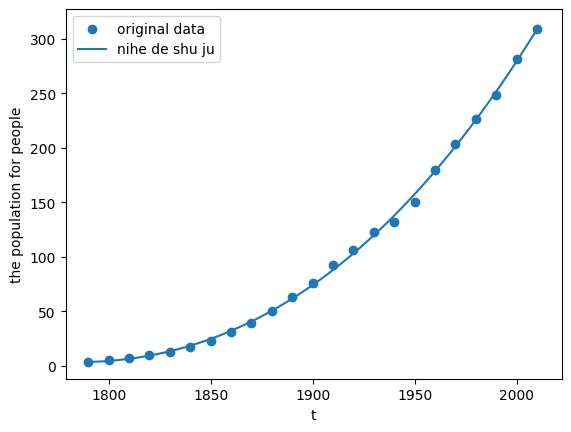

In [1]:
import matplotlib.pyplot as plt
import numpy as np

people = np.array(
    [
        3.929,
        5.308,
        7.240,
        9.638,
        12.87,
        17.07,
        23.19,
        31.44,
        39.82,
        50.19,
        62.95,
        76.21,
        92.22,
        106.0,
        122.8,
        132.2,
        150.7,
        179.3,
        203.3,
        226.5,
        248.7,
        281.4,
        308.7,
    ]
)
t = [i for i in range(1790, 2020, 10)]
# 拟合三次多项式
function = np.polyfit(t, people, 3)
functions = np.poly1d(function)
t1 = [i + 1 for i in range(1790, 2011)]
people1 = functions(t1)
# 画图
plt.scatter(t, people, label="original data")
plt.plot(t1, people1, label="nihe de shu ju")
plt.xlabel("t")
plt.ylabel("the population for people")
plt.legend()
plt.show
# 预测
print(
    f"2000预测{functions(2000):.2f},"
    f"2010预测:{functions(2010):.2f},"
    f"2020预测:{functions(2020):.2f}"
)


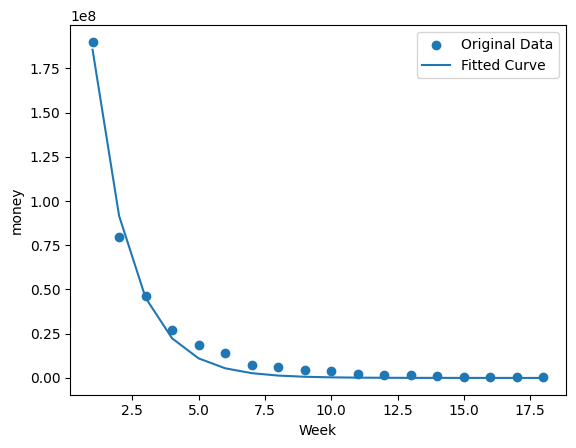

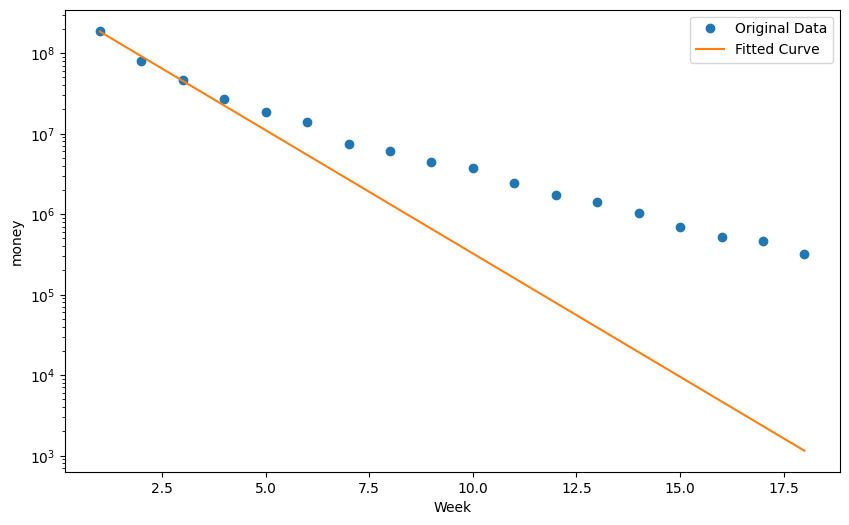

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

money = [
    189_932_838,
    79_406_327,
    46_230_374,
    26_830_921,
    18_804_290,
    13_822_248,
    7_474_688,
    6_129_424,
    4_377_675,
    3_764_963,
    2_426_574,
    1_713_298,
    1_426_102,
    1_031_985,
    694_947,
    518_242,
    460_578,
    317_909,
]
t = np.array([i for i in range(1, len(money) + 1)])


# 构造函数
def function(x, a, b):
    return a * np.exp(x * b)


# 拟合曲线
popt, pcov = curve_fit(function, t, money)
a, b = popt
money_1 = function(t, a, b)
# 画图
plt.scatter(t, money, label="Original Data")
plt.plot(t, money_1, "-", label="Fitted Curve")
plt.xlabel("Week")
plt.ylabel("money")
plt.legend()
plt.show()

# 绘制对数刻度图像
plt.figure(figsize=(10, 6))
plt.semilogy(t, money, "o", label="Original Data")
plt.semilogy(t, money_1, label="Fitted Curve")
plt.xlabel("Week")
plt.ylabel("money")
plt.legend()
plt.show()


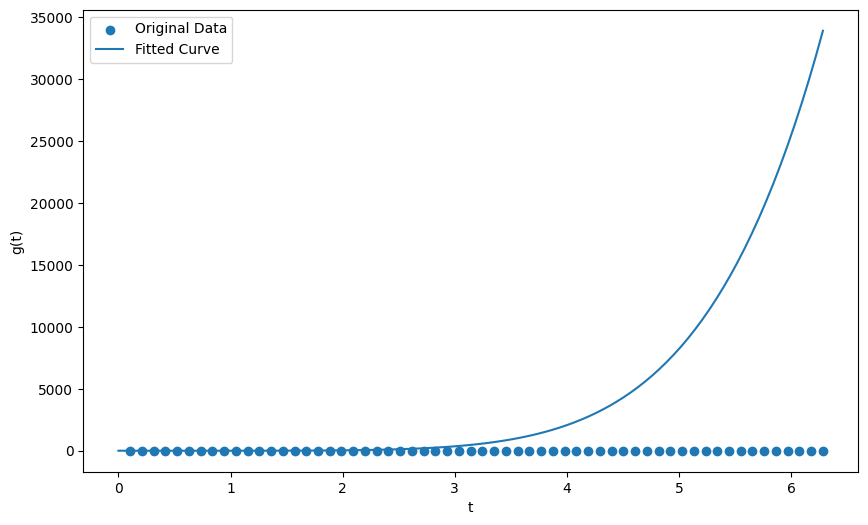

最小二乘拟合的系数:[-0.00257243  0.03336031 -0.07357639 -0.53831104  2.22512868 -1.35083068
  0.71212667]


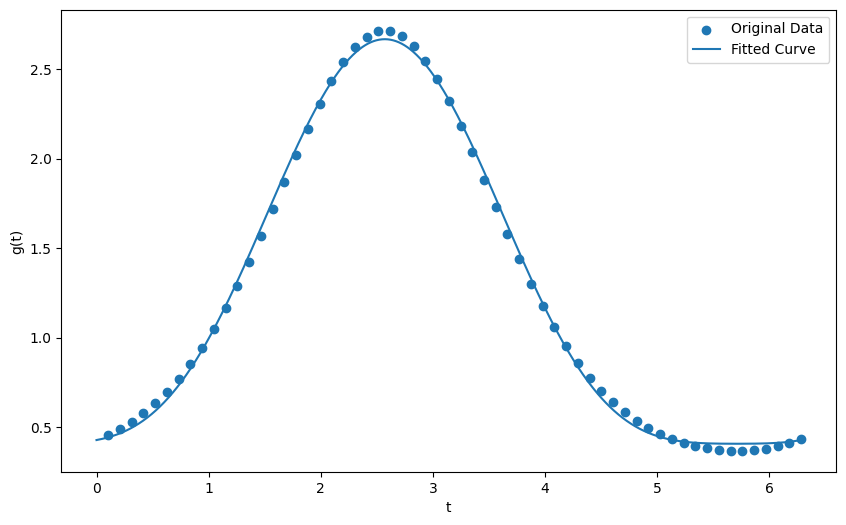

最小二乘拟合系数 d: [ 1.26606588 -0.95112998  0.61071353  0.11298193 -0.24687001]


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 时间数据
t = np.array([np.pi * 2 * i / 60 for i in range(1, 61)])


# 定义函数 g(x)
def g(x):
    return np.exp(np.sin(x - 1))


# 计算 g(t)
g_t = g(t)
# 构建矩阵 A（Vandermonde 矩阵）
A = np.vander(t, 7)
c = np.linalg.lstsq(A, g_t, rcond=None)[0]
t_fit = np.linspace(0, 2 * np.pi, 100)
y_fit = np.polyval(c[::-1], t_fit)
# 绘制原始数据点和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(t, g_t, label="Original Data")
# 生成拟合曲线的数据
plt.plot(t_fit, y_fit, label="Fitted Curve")
plt.xlabel("t")
plt.ylabel("g(t)")
plt.legend()
plt.show()
print(f"最小二乘拟合的系数:{c}")
# 构建矩阵
B = np.array([np.ones(len(t)), np.cos(t), np.sin(t), np.cos(2 * t), np.sin(2 * t)]).T
d = np.linalg.lstsq(B, g_t, rcond=None)[0]
t_fit = np.linspace(0, 2 * np.pi, 1000)
y_fit = (
    d[0]
    + d[1] * np.cos(t_fit)
    + d[2] * np.sin(t_fit)
    + d[3] * np.cos(2 * t_fit)
    + d[4] * np.sin(2 * t_fit)
)
# 绘制原始数据点和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(t, g_t, label="Original Data")
# 生成拟合曲线的数据
plt.plot(t_fit, y_fit, label="Fitted Curve")
plt.xlabel("t")
plt.ylabel("g(t)")
plt.legend()
plt.show()
print("最小二乘拟合系数 d:", d)


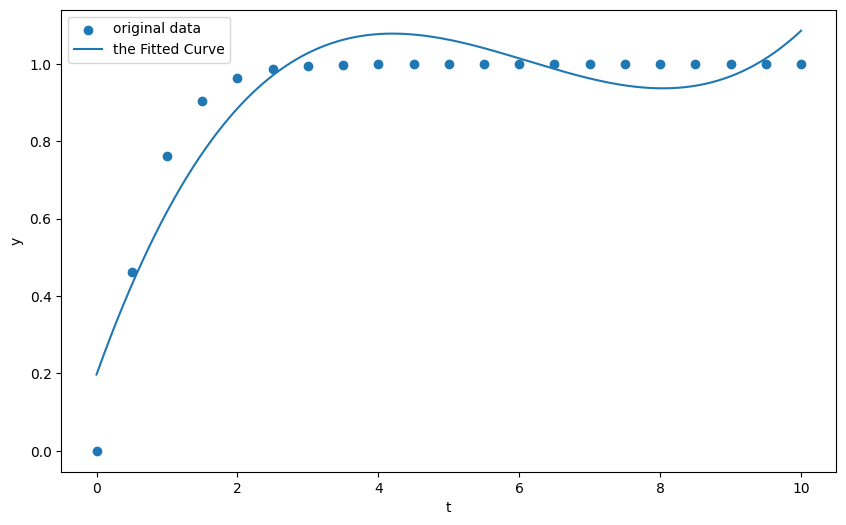

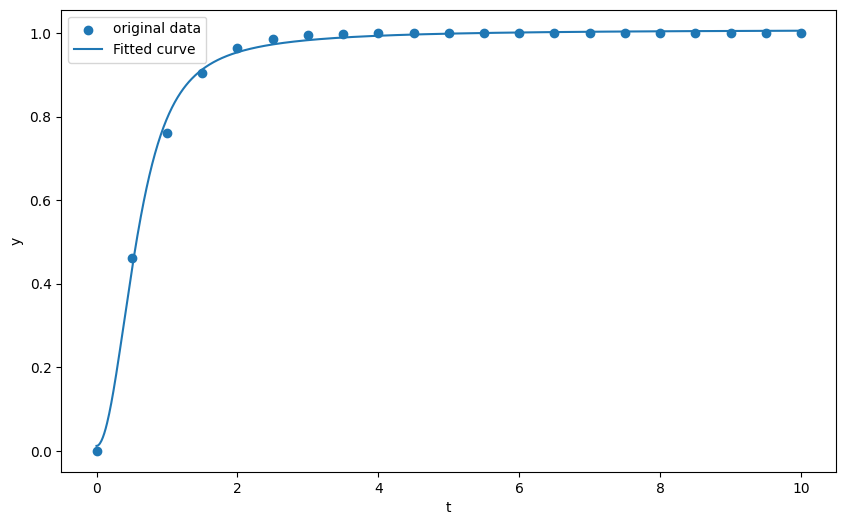

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

t = np.array([i for i in np.arange(0, 10.5, 0.5)])
y = np.array(np.tanh(t))
y_t = np.polyfit(t, y, 3)
y_t_1 = np.poly1d(y_t)
t_1 = np.linspace(0, 10, 1000)
y_1 = y_t_1(t_1)
# 拟合数据
plt.figure(figsize=(10, 6))
plt.scatter(t, y, label="original data")
plt.plot(t_1, y_1, label="the Fitted Curve")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


def func(t, c1, c2, c3, c4):
    z = t**2 / (1 + t**2)
    return c1 + c2 * z + c3 * z**2 + c4 * z**3


p0 = [1, 1, 1, 1]
popt, pcov = curve_fit(func, t, y, p0=p0)
c1, c2, c3, c4 = popt
t_2 = np.linspace(0, 10, 1000)
y_2 = func(t_2, c1, c2, c3, c4)
plt.figure(figsize=(10, 6))
plt.scatter(t, y, label="original data")
plt.plot(t_2, y_2, label="Fitted curve")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


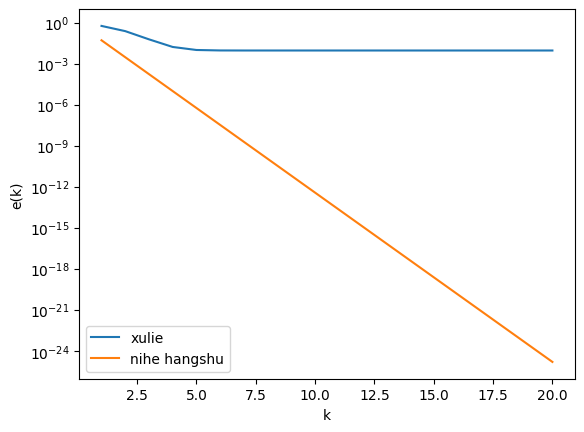

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# e(k)函数
def s_0(k):
    if k == 1:
        return 1
    if k == 2:
        return 1
    if k > 2:
        return s(k - 1) * (k - 1)


def s_1(k):
    if k == 1:
        return 1
    if k > 1:
        return s_1(k - 1) * (2 * k - 1)


def s(k):
    sum = 0
    for i in range(1, k + 1):
        sum += s_0(i) / s_1(i)
    return sum


k = np.array([i for i in range(1, 21)])
e_k = np.array([np.abs(s(i) - np.pi / 2) for i in k])
# 最小二乘拟合
Y = np.log10(e_k)
a, b = np.polyfit(k, Y, 1)
a = 10**a
b = 10**b
e1_k = np.array([a * b**i for i in range(1, 21)])
# 绘图
plt.semilogy(k, e_k, label="xulie")
plt.semilogy(k, e1_k, label="nihe hangshu")
plt.xlabel("k")
plt.ylabel("e(k)")
plt.legend()
plt.show()


C:\Users\leikun\AppData\Local\Temp\ipykernel_22132\944620184.py:9: RuntimeWarning: overflow encountered in power
  T1 = c*a**distance


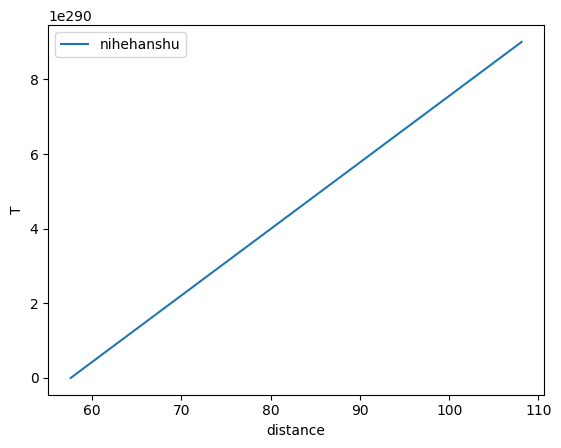

In [6]:
import matplotlib.pyplot as plt
import numpy as np

distance = np.array([57.59, 108.11, 149.57, 227.84, 778.14, 1427, 2870.3, 4499.9])
T = np.array([87.99, 224.7, 365.26, 686.98, 4332.4, 10759, 30684, 6188])
Y = np.log10(T)
c, a = np.polyfit(distance, Y, 1)
c = 10**c
a = 10**a
T1 = c * a**distance
plt.plot(distance, T1, label="nihehanshu")
plt.xlabel("distance")
plt.ylabel("T")
plt.legend()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# a部分
t = np.linspace(0, np.pi * 2, 500)
beta = np.array([2] + [1 + 10 ** (-i) for i in range(1, 9)])
A = []
# 构建举证
for beta1 in beta:
    A_1 = np.zeros((500, 3))
    A_1[:, 0] = 1
    A_1[:, 1] = np.sin(t)
    A_1[:, 2] = np.cos(beta1 * t)
    A.append(A_1)
# 构建条件数
condition_numbers = []
for i in A:
    cond = np.linalg.cond(i)
    condition_numbers.append(cond)
for b, conds in zip(beta, condition_numbers):
    print(f"beta:{b},condition numbers:{conds}")
# b部分
print()
condition_numbers_2 = []
A1 = []
for beta1 in beta:
    A_1 = np.zeros((500, 3))
    A_1[:, 0] = 1
    A_1[:, 1] = np.sin(t) ** 2
    A_1[:, 2] = np.cos(beta1 * t) ** 2
    A1.append(A_1)
for i in A1:
    cond = np.linalg.cond(i)
    condition_numbers_2.append(cond)
for b, conds in zip(beta, condition_numbers_2):
    print(f"beta:{b},condition numbers:{conds}")


beta:2.0,condition numbers:1.4156355745623685
beta:1.1,condition numbers:1.6666985648629835
beta:1.01,condition numbers:1.4340815373897535
beta:1.001,condition numbers:1.4167191836470372
beta:1.0001,condition numbers:1.415653133400492
beta:1.00001,condition numbers:1.4156358059363663
beta:1.000001,condition numbers:1.4156355819812243
beta:1.0000001,condition numbers:1.4156355751466736
beta:1.00000001,condition numbers:1.4156355746192228

beta:2.0,condition numbers:4.371331726310115
beta:1.1,condition numbers:9.460273464456888
beta:1.01,condition numbers:85.94765152783232
beta:1.001,condition numbers:851.1536908851056
beta:1.0001,condition numbers:8503.431786382132
beta:1.00001,condition numbers:85026.23667896993
beta:1.000001,condition numbers:850254.2880984871
beta:1.0000001,condition numbers:8502534.79721303
beta:1.00000001,condition numbers:85025340.48302929


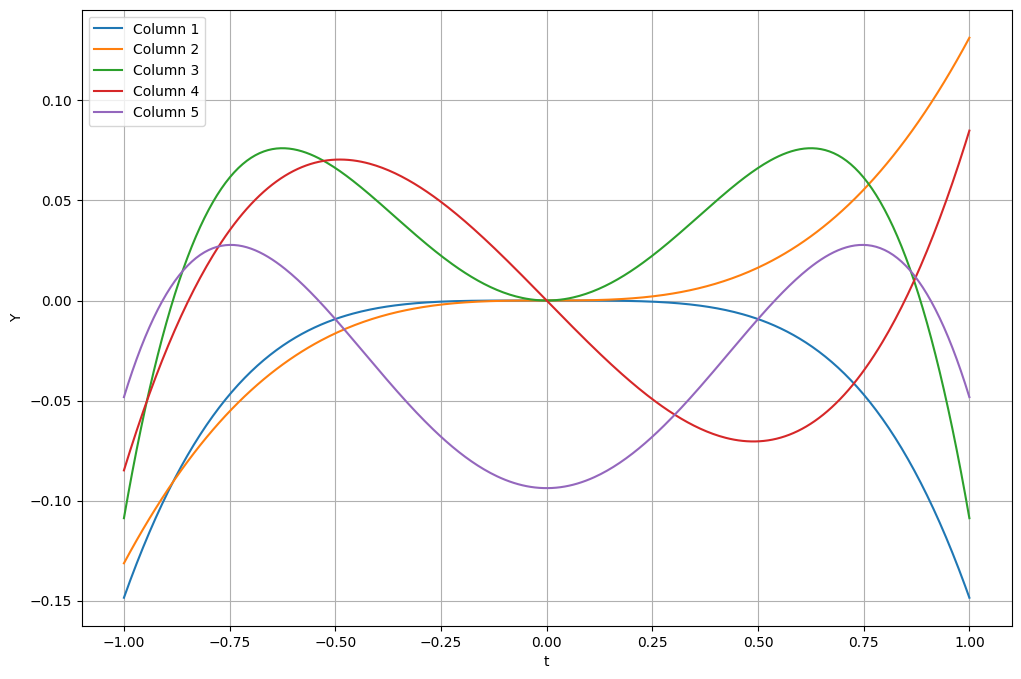

In [8]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-1, 1, 400)
# 生成小于 5 次的多项式的 Vandermonde 矩阵
V = np.vander(t, 5)
# 进行薄 QR 分解
Q, R = np.linalg.qr(V, mode="reduced")
# 绘制每一列作为向量的函数
plt.figure(figsize=(12, 8))
for i in range(Q.shape[1]):
    plt.plot(t, Q[:, i], label=f"Column {i+1}")
plt.xlabel("t")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import numpy as np


def householder(x, y):
    w = x - y
    norm_w = np.linalg.norm(w)
    if norm_w == 0:
        return np.eye(len(x))
    v = w / norm_w
    v = v.reshape(-1, 1)
    return np.eye(len(x)) - 2 * np.dot(v, v.T)


# 定义原始向量x和目标向量y
x = np.array([2, 9, -6])
y = np.array([11, 0, 0])
# 计算Householder矩阵P
P = householder(x, y)
# 验证结果
print("Householder矩阵P:")
print(P)


Householder矩阵P:
[[ 0.18181818  0.81818182 -0.54545455]
 [ 0.81818182  0.18181818  0.54545455]
 [-0.54545455  0.54545455  0.63636364]]
